# Homework 5

## Image Processing and Pixel Classification


This week's homework is about classifying pixels in a sattelite image:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd

In [34]:
salinas_gt[100]

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  0,  0,  0,
        0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  0,  0,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  0,  0,
        0,  0,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  0,  0,
        0,  0,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

The image below a sattelite image of Salinas Valley, California of 512 pixels by 217 pixels where individual values tells us what is planted in that specific area: 

0         Brocoli_green_weeds_1 
1         Brocoli_green_weeds_2 
2                        Fallow 
3             Fallow_rough_plow 
4                 Fallow_smooth 
5                       Stubble 
6                        Celery 
7              Grapes_untrained 
8          Soil_vinyard_develop 
9     Corn_senesced_green_weeds 
10          Lettuce_romaine_4wk 
11          Lettuce_romaine_5wk 
12          Lettuce_romaine_6wk 
13          Lettuce_romaine_7wk 
14            Vinyard_untrained 
15     Vinyard_vertical_trellis 
Name: Class , dtype: object

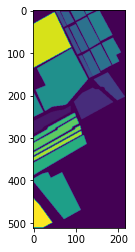

In [2]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas = loadmat('data/Salinas.mat')['salinas']
salinas_classes = pd.read_csv('data/Salinas_classes.csv',sep='\t')['Class ']
plt.imshow(salinas_gt)
salinas_classes

The main data `salinas` is a tensor (i.e. a multi-dimensional array) of shape (512,217,224). This means we have 224 different greyscale images taken in different wavelengths. Below, I am going to reshape the data into a matrix of shape $(512\cdot 217,224)$ so that each row is a flattened matrix.

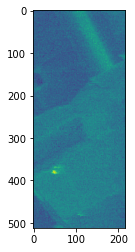

In [62]:
scaler = MinMaxScaler()
salinas_reshaped = scaler.fit_transform(salinas.reshape((512*217,224)))
salinas_gt_reshaped = salinas_gt.reshape(512*217)

plt.imshow(salinas_reshaped[:,0].reshape((512,217)))

In [12]:
salinas_reshaped.shape

(111104, 224)

## Question

Each pixel belongs to a specific class given by `salinas_classes`.  Form a 

1. Linear Discriminant Analysis model,
2. Support Vector Machines model,
3. Logistic Regression model,
4. Decision Tree model,
5. Boosted Tree model

to predict which pixel belongs to which class. Train and test your model and evaluate your accuracy together with a confidence interval.

#### Answer:
 We have 512*217 samples and each sample has 224 predictor. And the salinas_gt is class of each pixel. 

In [67]:
X=salinas_reshaped
y=salinas_gt_reshaped

#### a) LDA model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.proportion import proportion_confint

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [81]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda.score(X_test,y_test)


0.8132397281850502

Confidence interval for %95:

In [103]:
lower, upper = proportion_confint(81, len(X_test), 0.05)

print('confidance interval with 0.05: lower=%.3f, upper=%.3f' % (lower, upper))


confidance interval with 0.05: lower=0.003, upper=0.004


#### b)SVM model

In [83]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8424913370235363

In [104]:
lower, upper = proportion_confint(84, len(X_test), 0.05)

print('confidance interval with 0.05: lower=%.3f, upper=%.3f' % (lower, upper))


confidance interval with 0.05: lower=0.003, upper=0.005


In [88]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(solver="newton-cg")
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.786688267854732

In [102]:
lower, upper = proportion_confint(78, len(X_test), 0.05)

print('confidance interval with 0.05: lower=%.3f, upper=%.3f' % (lower, upper))


confidance interval with 0.05: lower=0.003, upper=0.004


#### c) Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.8971693443139372

In [101]:
lower, upper = proportion_confint(90, len(X_test), 0.05)

print('confidance interval with 0.05: lower=%.3f, upper=%.3f' % (lower, upper))

confidance interval with 0.05: lower=0.003, upper=0.005


#### d) Boosted Tree 

In [97]:
import xgboost as xgb

XGB=xgb.XGBClassifier(eval_metric= 'mlogloss')
XGB.fit(X_train,y_train)



C:\Users\Pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


NameError: name 'x_test' is not defined

In [98]:
XGB.score(X_test,y_test)

0.9414067773727555

In [100]:
lower, upper = proportion_confint(95, len(X_test), 0.05)

print('confidance interval with 0.05: lower=%.3f, upper=%.3f' % (lower, upper))

confidance interval with 0.05: lower=0.003, upper=0.005
